## Importing Libraries & getting Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/glassdoor_jobs.csv')

In [3]:
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [5]:
data.drop(columns='Unnamed: 0',axis=1 ,inplace=True)

In [6]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [7]:
data.shape

(956, 14)

## Handling Missing Values

In [8]:
data.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

# EDA & Data Cleaning

--> Plotting bargraphs and countplots for numerical and categorical features respectively.

--> Removing unwanted columns

--> Handling NaN/missing values

--> Removing unwanted alphabet/special characters from the features

## Analyzing Rating

In [9]:
data.Rating.describe()

count    956.000000
mean       3.601255
std        1.067619
min       -1.000000
25%        3.300000
50%        3.800000
75%        4.200000
max        5.000000
Name: Rating, dtype: float64

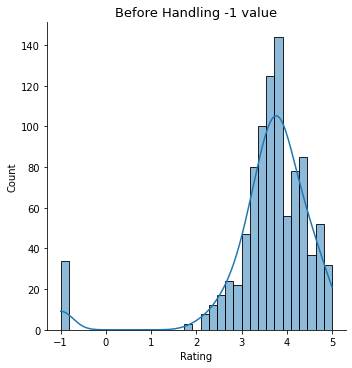

In [10]:
sns.displot(data['Rating'] ,kde=True)
plt.title('Before Handling -1 value',fontsize=13)
plt.show()

In [11]:
# as the graph follows Gaussian Distribution ,replace the '-1' values by the mean of the distribution 

data['Rating'] = data['Rating'].apply(lambda x:np.NaN if x==-1 else x)
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())


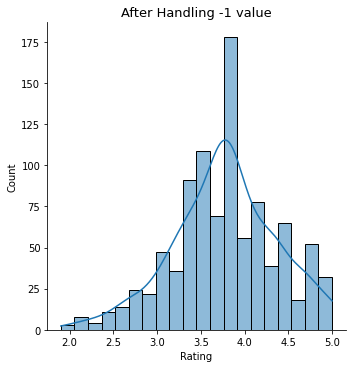

In [12]:
sns.displot(data['Rating'], kde=True)
plt.title('After Handling -1 value', fontsize=13)
plt.show()

### Outlier Detection in Rating

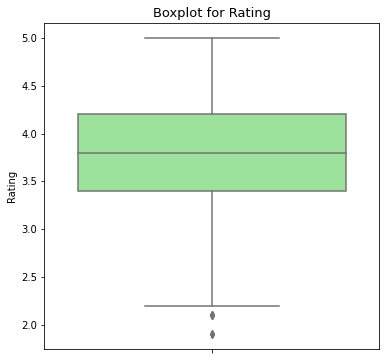

In [13]:
plt.figure(figsize=(6,6))
plt.title('Boxplot for Rating', fontsize=13 )
sns.boxplot(y='Rating' ,data=data ,color='lightgreen')
plt.show()


## Analyzing Founded

In [14]:
data.Founded.describe()

count     956.000000
mean     1774.605649
std       598.942517
min        -1.000000
25%      1937.000000
50%      1992.000000
75%      2008.000000
max      2019.000000
Name: Founded, dtype: float64

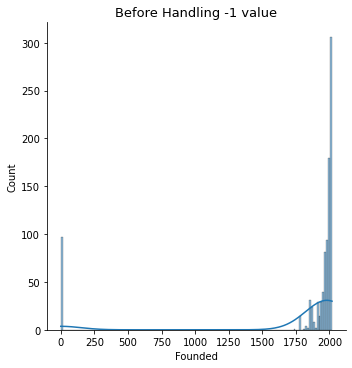

In [15]:
sns.displot(data['Founded'], kde=True)
plt.title('Before Handling -1 value', fontsize=13)
plt.show()


In [16]:
# as the graph doesnt follow Gaussian distribution ,so replace '-1' value by the median of the distribution 

data['Founded'] = data['Founded'].apply(lambda x: np.NaN if x==-1 else x)
data['Founded'] = data['Founded'].fillna(data['Founded'].median())
data['Founded'] = data['Founded'].astype('int')

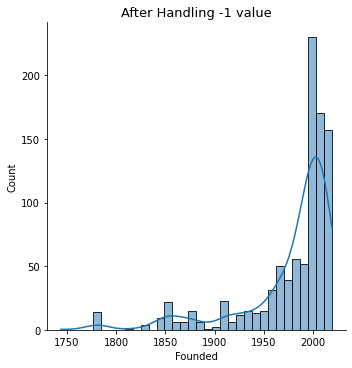

In [17]:
sns.displot(data['Founded'], kde=True)
plt.title('After Handling -1 value', fontsize=13)
plt.show()

### Outlier Detection in Founded

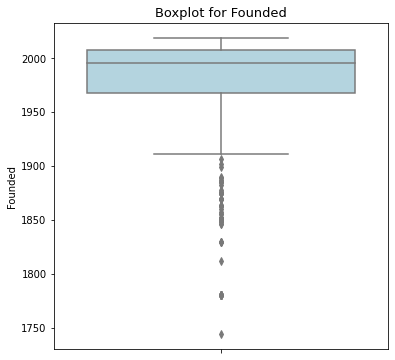

In [18]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='Founded', data=data,color='lightblue')
plt.title('Boxplot for Founded', fontsize=13)
plt.show()


## Analyzing Job Title

In [19]:
data['Job Title'].value_counts()[:20]

Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  4
Pharmaco

### Cleaning Job Title

In [20]:
def cleaning_job_title(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'machine learning' in title.lower():
        return 'mle'
    else: 
        return 'other'

In [21]:
data['jobTitle'] = data['Job Title'].apply(cleaning_job_title)
data['jobTitle'].value_counts()

data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: jobTitle, dtype: int64

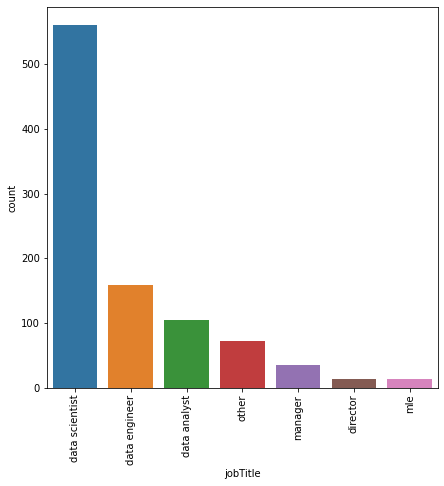

In [22]:
plt.figure(figsize=(7,7))
sns.countplot(x='jobTitle', data=data,order=data['jobTitle'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


## Analyzing Job-Title Seniority (not given originally but might be helpful)

In [23]:
def getting_title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

In [24]:
data['jobSeniority'] = data['Job Title'].apply(getting_title_seniority)
data['jobSeniority'].value_counts()

other    701
sr       252
jr         3
Name: jobSeniority, dtype: int64

In [25]:
data.drop(columns=['Job Title'] ,axis=1 ,inplace=True)

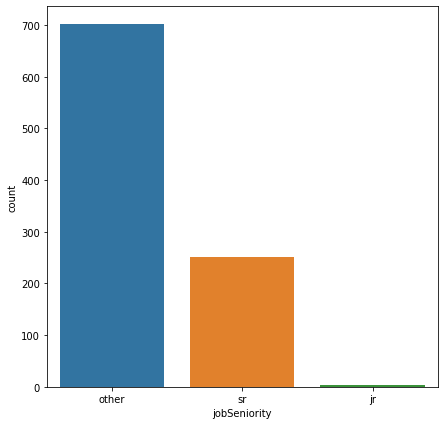

In [26]:
plt.figure(figsize=(7, 7))
sns.countplot(x='jobSeniority', data=data,order=data['jobSeniority'].value_counts().index)
plt.show()


## Analysing Company Name 

In [27]:
data['Company Name'].head()

0                        Tecolote Research\n3.8
1    University of Maryland Medical System\n3.4
2                                  KnowBe4\n4.8
3                                     PNNL\n3.8
4                       Affinity Solutions\n2.9
Name: Company Name, dtype: object

In [28]:
data['Company Name'] = data['Company Name'].apply(lambda x: x.split('\n')[0])


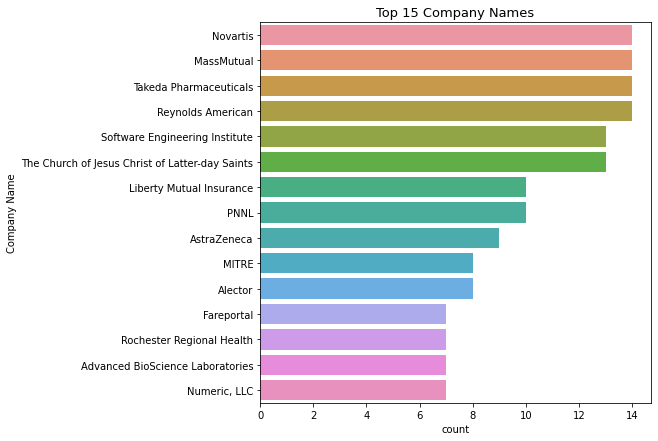

In [29]:
plt.figure(figsize=(7, 7))
sns.countplot(y='Company Name', data=data,
                order=data['Company Name'].value_counts()[:15].index)
plt.title('Top 15 Company Names',fontsize=13)
plt.show()


## Analyzing Location

In [30]:
data['Location'].head()

0    Albuquerque, NM
1      Linthicum, MD
2     Clearwater, FL
3       Richland, WA
4       New York, NY
Name: Location, dtype: object

In [31]:
data['jobState'] = data['Location'].apply(lambda x:x if ',' not in x else x.split(',')[1].strip())
print('Total number of unique locations: {}'.format(len(data['jobState'].unique())))


Total number of unique locations: 46


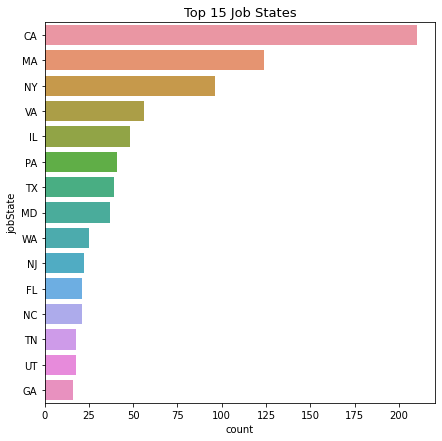

In [32]:
plt.figure(figsize=(7, 7))
sns.countplot(y='jobState', data=data,
                order=data['jobState'].value_counts()[:15].index)
plt.title('Top 15 Job States', fontsize=13)
plt.show()


## Analysing Size

In [33]:
data['Size'].head()

0     501 to 1000 employees
1          10000+ employees
2     501 to 1000 employees
3    1001 to 5000 employees
4       51 to 200 employees
Name: Size, dtype: object

In [34]:
data['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [35]:
def analysing_size(title):
    if '-1' in title.lower():
        return 'Unknown'
    else: 
        return title 


data['Size'] = data['Size'].apply(analysing_size)

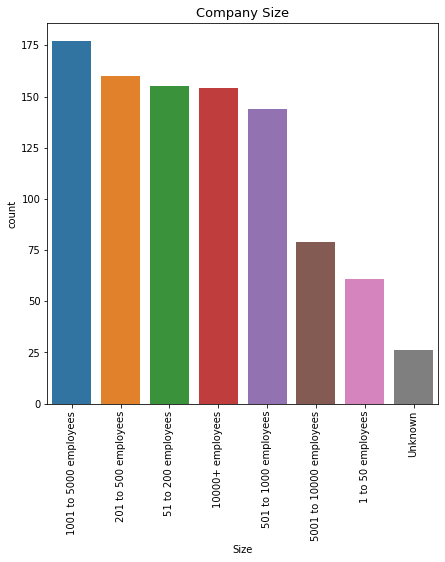

In [36]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Size', data=data,order=data['Size'].value_counts().index)
plt.title('Company Size', fontsize=13)
plt.xticks(rotation=90)
plt.show()


## Analysing Type of Ownership

In [37]:
data['Type of ownership'].head()

0     Company - Private
1    Other Organization
2     Company - Private
3            Government
4     Company - Private
Name: Type of ownership, dtype: object

In [38]:
data['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [39]:
def analysing_ownership(title):
    if 'private' in title.lower():
        return 'Private'
    elif 'public' in title.lower():
        return 'Public'
    elif ('-1' in title.lower()) or ('unknown' in title.lower()) or ('school / school district' in title.lower()) or ('private practice / firm' in title.lower()) or ('contract' in title.lower()):
        return 'Other Organization'
    else:
        return title


data['Type of ownership'] = data['Type of ownership'].apply(analysing_ownership)

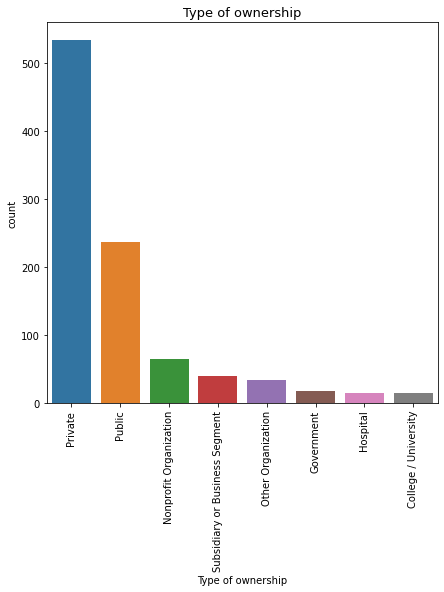

In [40]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Type of ownership', data=data,
              order=data['Type of ownership'].value_counts().index)
plt.title('Type of ownership', fontsize=13)
plt.xticks(rotation=90)
plt.show()


## Analysing Industry

In [41]:
data.Industry.value_counts()[:20]

Biotech & Pharmaceuticals                  148
IT Services                                 77
Computer Hardware & Software                70
Insurance Carriers                          65
Enterprise Software & Network Solutions     56
Health Care Services & Hospitals            51
Staffing & Outsourcing                      39
-1                                          39
Internet                                    36
Consulting                                  34
Aerospace & Defense                         32
Advertising & Marketing                     25
Consumer Products Manufacturing             23
Research & Development                      21
Banks & Credit Unions                       19
Colleges & Universities                     18
Lending                                     14
Energy                                      14
Religious Organizations                     13
Federal Agencies                            13
Name: Industry, dtype: int64

In [42]:
data['Industry'] = data['Industry'].apply(lambda x:'Others' if x=='-1' else x)

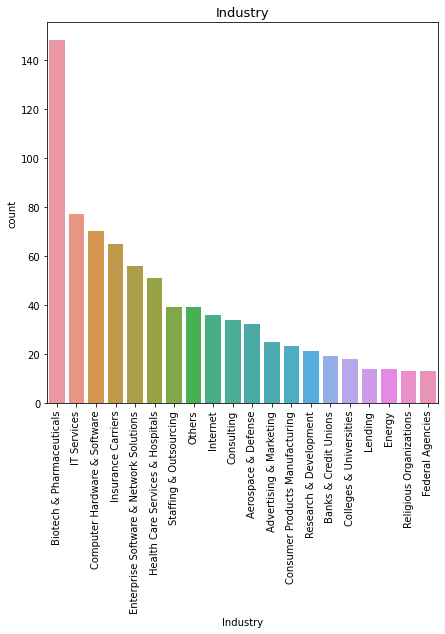

In [43]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Industry', data=data,
              order=data['Industry'].value_counts()[:20].index)
plt.title('Industry', fontsize=13)
plt.xticks(rotation=90)
plt.show()


## Analysing Sector

In [44]:
data.Sector.value_counts()


Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

In [45]:
data['Sector'] = data['Sector'].apply(
    lambda x: 'Others' if x == '-1' else x)

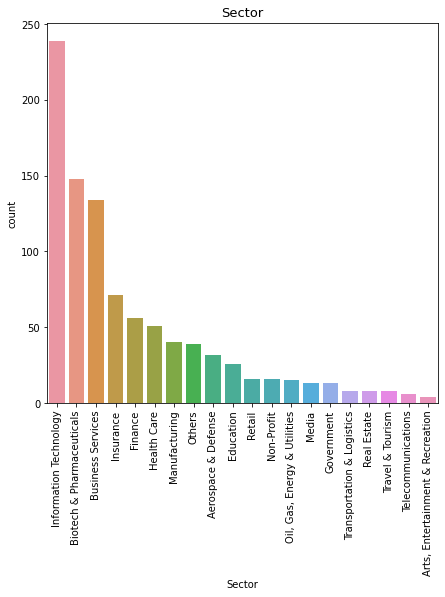

In [46]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Sector', data=data,
              order=data['Sector'].value_counts()[:20].index)
plt.title('Sector', fontsize=13)
plt.xticks(rotation=90)
plt.show()


## Analysing Revenue

In [47]:
data.Revenue.value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [48]:
def analysing_revenue(title):
    if '-1' in title.lower():
        return 'Unknown / Non-Applicable'
    else:
        return title

data['Revenue'] = data['Revenue'].apply(analysing_revenue)


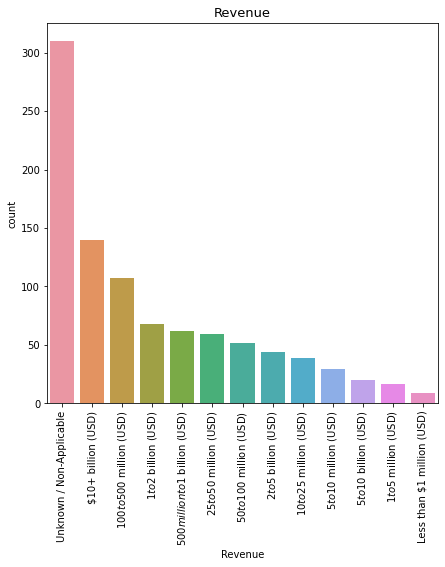

In [49]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Revenue', data=data,
              order=data['Revenue'].value_counts().index)
plt.title('Revenue', fontsize=13)
plt.xticks(rotation=90)
plt.show()


## Analysing Competitors 

In [50]:
data['Competitors'].head()

0                                                   -1
1                                                   -1
2                                                   -1
3    Oak Ridge National Laboratory, National Renewa...
4                 Commerce Signals, Cardlytics, Yodlee
Name: Competitors, dtype: object

In [51]:
data['Competitors'].value_counts()[:15]

-1                                                                                              634
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
Battelle, General Atomics, SAIC                                                                   8
Expedia Group, Orbitz Worldwide, Priceline.com                                                    7
Pitney Bowes                                                                                      6
FLURRY, Chartboost                                                                                6
Leidos, CACI International, Booz Allen Hamilton                                                   6


In [52]:
data['Competitors'] = data['Competitors'].apply(lambda x:len(x.split(','))if x!='-1' else 0)

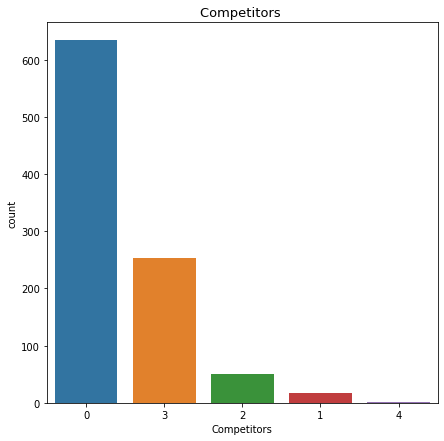

In [53]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Competitors', data=data,
              order=data['Competitors'].value_counts().index)
plt.title('Competitors ', fontsize=13)
plt.show()


## Analysing Salary

In [54]:
data['Salary Estimate'].head()

0     $53K-$91K (Glassdoor est.)
1    $63K-$112K (Glassdoor est.)
2     $80K-$90K (Glassdoor est.)
3     $56K-$97K (Glassdoor est.)
4    $86K-$143K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [55]:
data['Salary Estimate'].describe()

count     956
unique    417
top        -1
freq      214
Name: Salary Estimate, dtype: object

In [56]:
salary = data['Salary Estimate'].apply(lambda x:x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [57]:
salary.value_counts()[:10]

-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
$81K-$167K            5
$76K-$142K            5
$74K-$124K            5
$107K-$173K           5
$18-$25 Per Hour      4
Name: Salary Estimate, dtype: int64

In [58]:
salary = salary.apply(lambda x:np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [59]:
# Removing '$' and 'K' from salary 

salary = salary.apply(lambda x: x if type(x) == type(3.5) else x.replace('$', '').replace('K', ''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [60]:
print('Length of Salary: ',len(salary.unique()))

Length of Salary:  417


In [61]:
# Removing the string employer provided salary from salary array

salary = salary.apply(lambda x: x if type(x) == type(
    3.5) else x.lower().replace("employer provided salary:", ""))


In [62]:
# Converting per hour salaries to per year salaries(assuming 45 work hours per week and 52 working weeks)

def hourly_to_yearly(minlimit, maxlimit):
    x = minlimit.strip()
    y = maxlimit.strip()
    x = int(int(minlimit)*45*52/1000)
    y = int(int(maxlimit)*45*52/1000)
    return '{}-{}'.format(x, y)


salary = salary.apply(lambda x: x if type(x) == type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))

salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

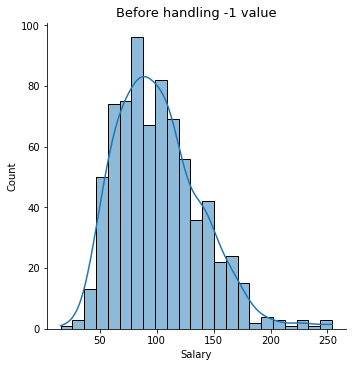

In [63]:
# Creating column for salary i.e. average of the range

data['Salary'] = salary.apply(lambda x:  x if type(x) == type(
    3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

sns.displot(data['Salary'],kde=True)
plt.title('Before handling -1 value', fontsize=13)
plt.show()


In [64]:
# as the graph follows Gaussian distribution but has a few outliers,so replace '-1' value by the median of the distribution

data['Salary'] = data['Salary'].fillna(data['Salary'].median())

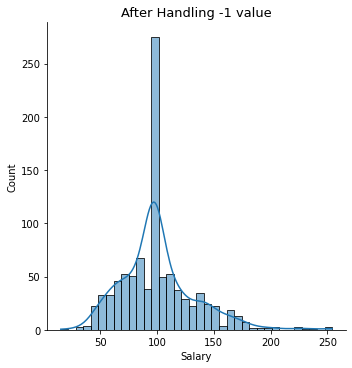

In [65]:
sns.displot(data['Salary'], kde=True)
plt.title('After Handling -1 value', fontsize=13)
plt.show()

### Outlier Detection in Salaries

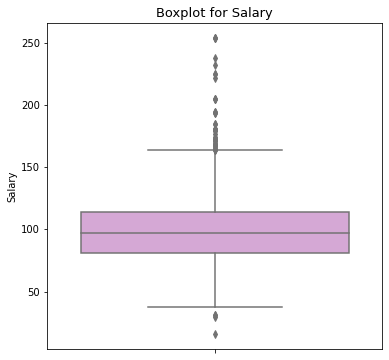

In [66]:
plt.figure(figsize=(6, 6))
plt.title('Boxplot for Salary', fontsize=13)
sns.boxplot(y='Salary', data=data, color='plum')
plt.show()

## Correlation

<AxesSubplot:>

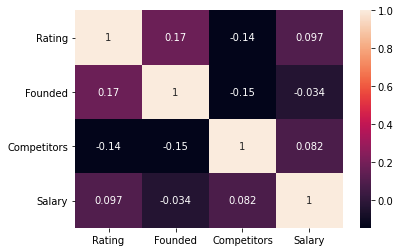

In [67]:
sns.heatmap(data.corr() ,annot=True)

# Feature Engineering
--> Creating new features from existing features

--> Trimming Columns

--> Handling ordinal and nominal categorical features

--> Feature Selection

## --> Creating new features from existing features

In [68]:
data.columns

Index(['Salary Estimate', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'jobTitle',
       'jobSeniority', 'jobState', 'Salary'],
      dtype='object')

### Jobheadquarters (from Location)

In [69]:
data['jobHeadquarters'] = data.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0,axis=1)

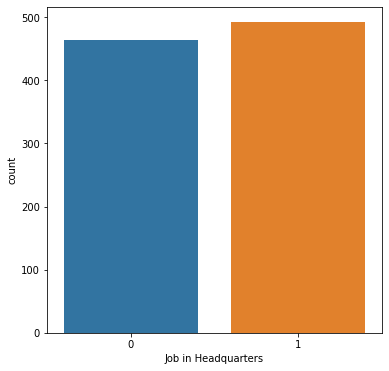

In [70]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='jobHeadquarters', data=data)
p = plt.xlabel("Job in Headquarters")


In [71]:
data.drop(columns=['Location'] ,axis=1 ,inplace=True)

### Python, Excel, SQL, Tableau Jobs( from Job Description)

In [72]:
data['pythonJob'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
data['excelJob'] = data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
data['sqlJob'] = data['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
data['tableauJob'] = data['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

Text(0.5, 0, 'Python Job')

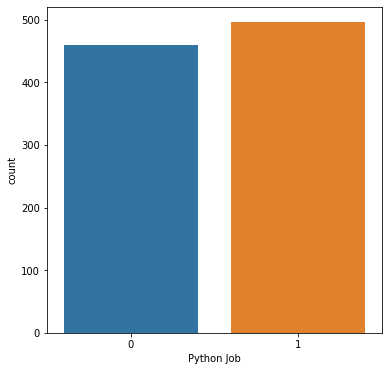

In [73]:
plt.figure(figsize=(6, 6))
sns.countplot(x='pythonJob', data=data)
plt.xlabel("Python Job")


Text(0.5, 0, 'Excel Job')

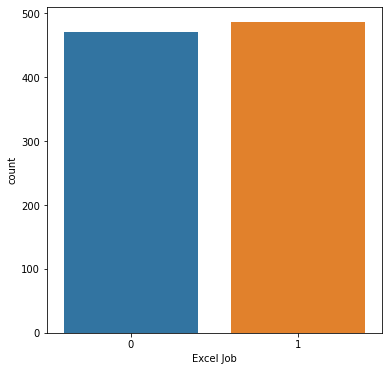

In [74]:
plt.figure(figsize=(6, 6))
sns.countplot(x='excelJob', data=data)
plt.xlabel("Excel Job")

Text(0.5, 0, 'SQL Job')

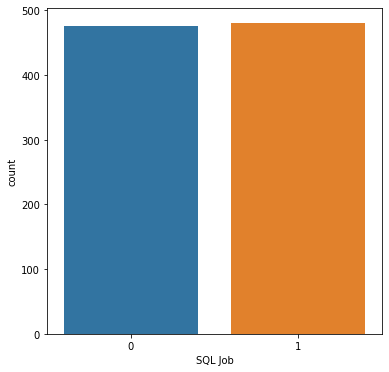

In [75]:
plt.figure(figsize=(6, 6))
sns.countplot(x='sqlJob', data=data)
plt.xlabel("SQL Job")

Text(0.5, 0, 'Tableau Job')

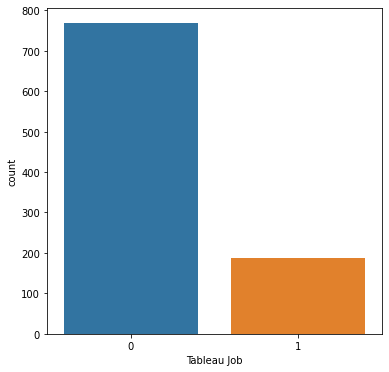

In [76]:
plt.figure(figsize=(6, 6))
sns.countplot(x='tableauJob', data=data)
plt.xlabel("Tableau Job")

## --> Trimming Columns (for reducing dimensionality)

In [77]:
# Taking top 9 States and replacing others by 'Others'

job_location_list = list(data['jobState'].value_counts()[:9].index)

def job_location_simplifier(title):
    if title not in job_location_list:
        return 'Others'
    else:
        return title

data['jobState'] = data['jobState'].apply(job_location_simplifier)


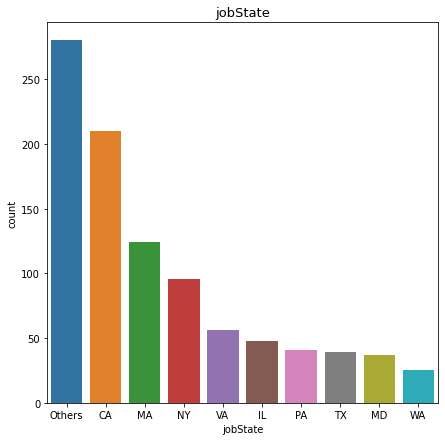

In [78]:
plt.figure(figsize=(7, 7))
sns.countplot(x='jobState', data=data,
              order=data['jobState'].value_counts().index)
plt.title('jobState', fontsize=13)
plt.show()


In [79]:
# Taking top 9 Sector and replacing remaining by 'Others'

sector_list = list(data['Sector'].value_counts()[:10].index)


def sector_simplifier(title):
    if title not in sector_list:
        return 'Others'
    else:
        return title

data['Sector'] = data['Sector'].apply(sector_simplifier)

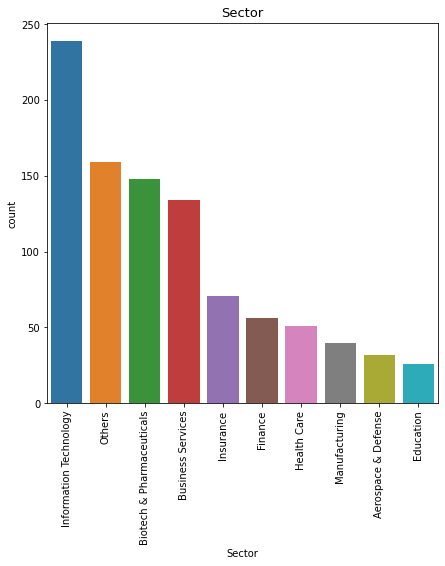

In [80]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Sector', data=data,
              order=data['Sector'].value_counts().index)
plt.title('Sector', fontsize=13)
plt.xticks(rotation=90)
plt.show()


In [81]:
data.columns

Index(['Salary Estimate', 'Job Description', 'Rating', 'Company Name',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'jobTitle', 'jobSeniority',
       'jobState', 'Salary', 'jobHeadquarters', 'pythonJob', 'excelJob',
       'sqlJob', 'tableauJob'],
      dtype='object')

In [82]:
data.drop(columns=['Job Description','Salary Estimate', 'Company Name',
        'Headquarters', 'Industry', 'jobState'],axis=1 ,inplace=True)


## --> Handling ordinal and nominal categorical features

### Ordinal Features

In [83]:
# Mapping ranks to 'company_size' column

size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,'501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

# Mapping ranks to 'revenue' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,'$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,'$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)': 10, '$5 to $10 billion (USD)': 11,
'$10+ billion (USD)': 12}


# Mapping ranks to 'job_seniority' column
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

data['Size'] = data['Size'].map(size_map)
data['Revenue'] = data['Revenue'].map(revenue_map)
data['jobSeniority'] = data['jobSeniority'].map(job_seniority_map)


In [84]:
data.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Sector', 'Revenue',
       'Competitors', 'jobTitle', 'jobSeniority', 'Salary', 'jobHeadquarters',
       'pythonJob', 'excelJob', 'sqlJob', 'tableauJob'],
      dtype='object')

### Nominal Features

In [85]:
data.head()

,Rating,Size,Founded,Type of ownership,Sector,Revenue,Competitors,jobTitle,jobSeniority,Salary,jobHeadquarters,pythonJob,excelJob,sqlJob,tableauJob
0,3.8,4,1973,Private,Aerospace & Defense,6,0,data scientist,0,72.0,0,1,1,0,1
1,3.4,7,1984,Other Organization,Health Care,10,0,data scientist,0,87.5,0,1,0,0,0
2,4.8,4,2010,Private,Business Services,7,0,data scientist,0,85.0,1,1,1,1,0
3,3.8,5,1965,Government,Others,8,3,data scientist,0,76.5,1,1,0,0,0
4,2.9,2,1998,Private,Business Services,0,3,data scientist,0,114.5,1,1,1,1,0


In [86]:
# type of ownership 

print('Shape before encoding Ownership : ' ,data.shape)
data = pd.get_dummies(columns=['Type of ownership'],data=data ,prefix='ownership')
print('Shape after encoding Ownership : ', data.shape)

Shape before encoding Ownership :  (956, 15)
Shape after encoding Ownership :  (956, 22)


In [87]:
# Sector

print('Shape before encoding Sector : ', data.shape)
data = pd.get_dummies(columns=['Sector'],
                      data=data, prefix='sector')
print('Shape after encoding Sector : ', data.shape)


Shape before encoding Sector :  (956, 22)
Shape after encoding Sector :  (956, 31)


In [88]:
# Job title

print('Shape before encoding JobTitle : ', data.shape)
data = pd.get_dummies(columns=['jobTitle'], data=data)
print('Shape after encoding JobTitle : ', data.shape)


Shape before encoding JobTitle :  (956, 31)
Shape after encoding JobTitle :  (956, 37)


In [89]:
data.drop(columns=['ownership_Other Organization','sector_Others', 'jobTitle_other'],axis=1 ,inplace=True)

## --> Feature Selection (using Information Gain)

In [90]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [91]:
X = data.drop('Salary',axis=1)
y = data['Salary']

In [92]:
kbest = SelectKBest(score_func=mutual_info_regression ,k='all')
kbest.fit(X,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x00000261B8F38B80>)

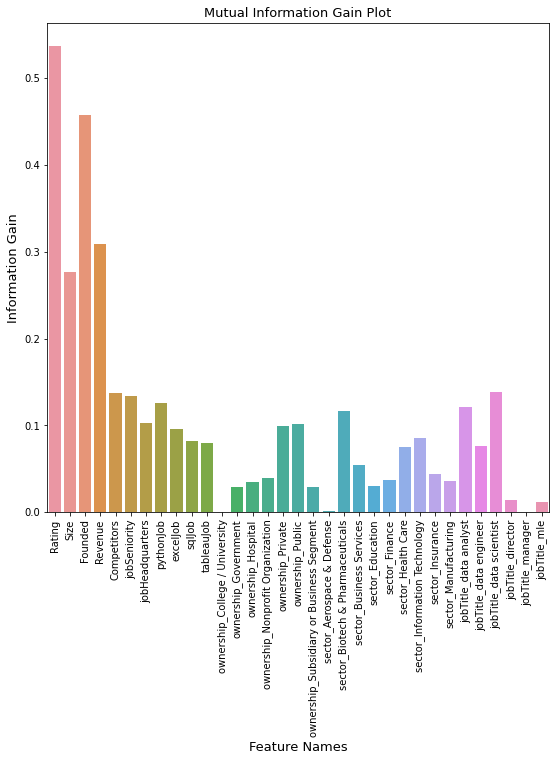

In [93]:
plt.figure(figsize=(9,9))
sns.barplot(x=X.columns ,y=kbest.scores_)
plt.xticks(rotation=90)
plt.title('Mutual Information Gain Plot',fontsize=13)
plt.xlabel('Feature Names' ,fontsize=13)
plt.ylabel('Information Gain', fontsize=13)
plt.show()


In [94]:
feature_importance = pd.DataFrame(kbest.scores_ ,columns=['Score'] ,index=X.columns)

top20_features = feature_importance.nlargest(n=20 , columns=['Score'])

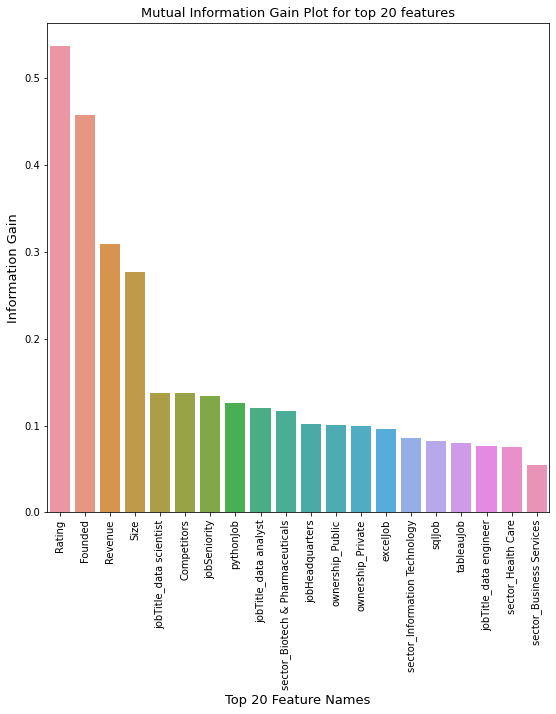

In [95]:
plt.figure(figsize=(9, 9))
sns.barplot(x=top20_features.index, y=top20_features['Score'])
plt.xticks(rotation=90)
plt.title('Mutual Information Gain Plot', fontsize=13)
plt.xlabel('Top 20 Feature Names', fontsize=13)
plt.ylabel('Information Gain', fontsize=13)
plt.show()


### Correlation (between top 20 features)

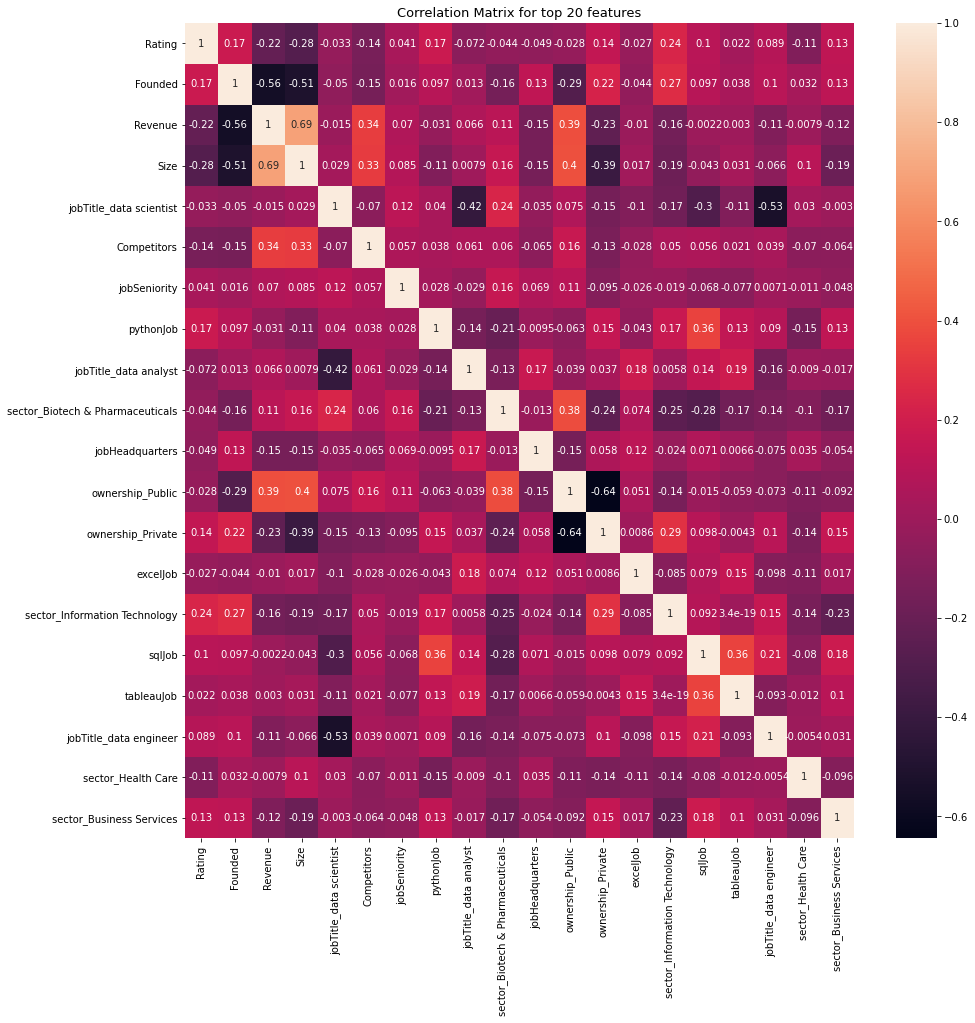

In [96]:
plt.figure(figsize=(15, 15))
sns.heatmap(X[top20_features.index].corr() , annot=True)
plt.title('Correlation Matrix for top 20 features', fontsize=13)
plt.show()


In [97]:
# dropping highly correlated features 
X = X[top20_features.index]
X.drop(columns=['ownership_Public', 'Size', 'Revenue',
                'jobTitle_data scientist'], axis=1, inplace=True)


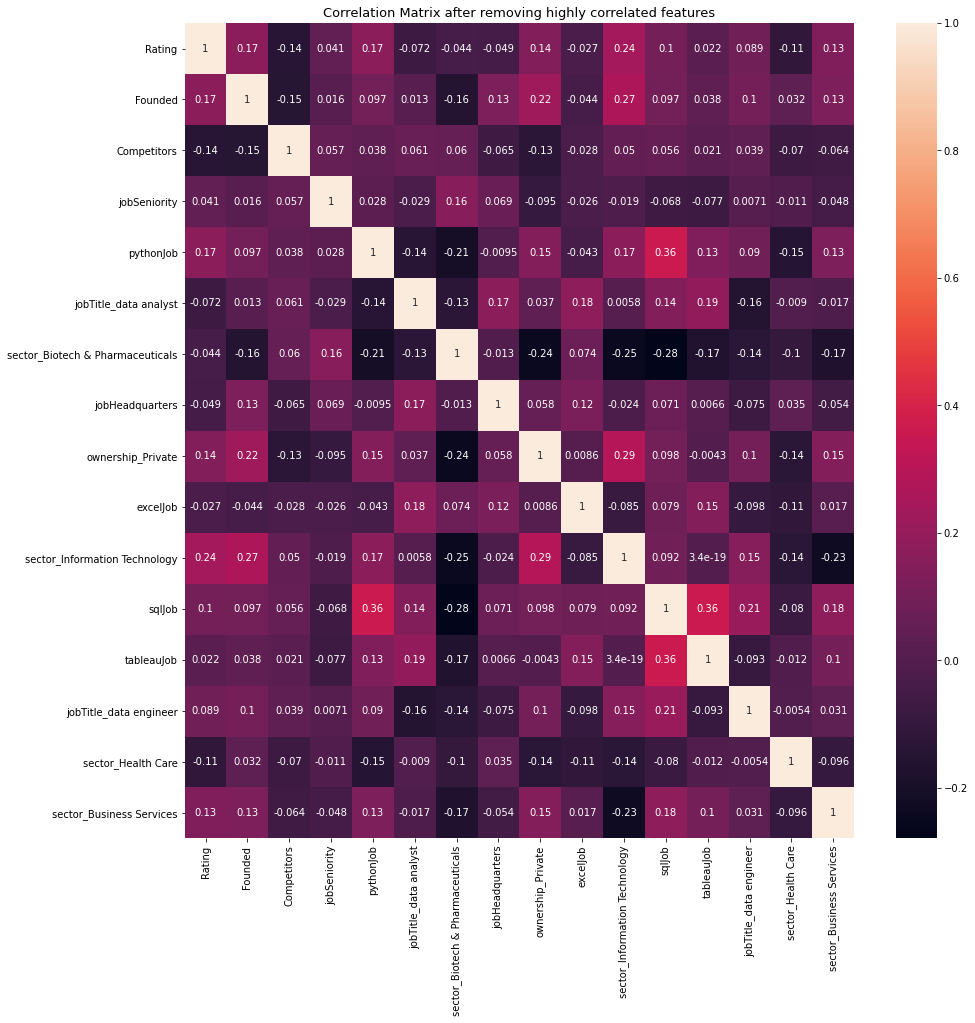

In [98]:
# Finding and plotting the correlation matrix for the remaining features

# Observing that the matrix is much darker in color compared to previous matrix.

plt.figure(figsize=(15, 15))
sns.heatmap(X.corr(), annot=True)
plt.title('Correlation Matrix after removing highly correlated features', fontsize=13)
plt.show()


## --> Feature Scaling

In [99]:
X.head()

,Rating,Founded,Competitors,jobSeniority,pythonJob,jobTitle_data analyst,sector_Biotech & Pharmaceuticals,jobHeadquarters,ownership_Private,excelJob,sector_Information Technology,sqlJob,tableauJob,jobTitle_data engineer,sector_Health Care,sector_Business Services
0,3.8,1973,0,0,1,0,0,0,1,1,0,0,1,0,0,0
1,3.4,1984,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,4.8,2010,0,0,1,0,0,1,1,1,0,1,0,0,0,1
3,3.8,1965,3,0,1,0,0,1,0,0,0,0,0,0,0,0
4,2.9,1998,3,0,1,0,0,1,1,1,0,1,0,0,0,1


In [100]:
X.shape

(956, 16)

In [101]:
X_prev = X.copy()

In [102]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X['Rating'] = scaler.fit_transform(X[['Rating']])
X['Founded'] = scaler.fit_transform(X[['Founded']])

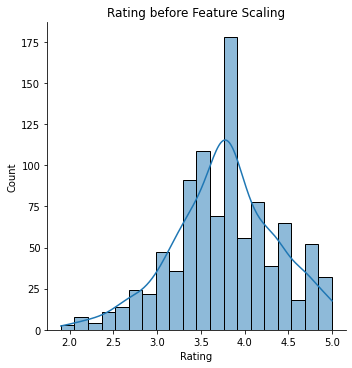

In [103]:
# Plotting Rating before & after feature scaling

sns.displot(X_prev['Rating'],kde=True)
plt.title('Rating before Feature Scaling')
plt.show()

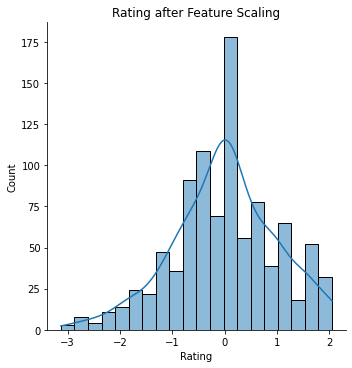

In [104]:
sns.displot(X['Rating'],kde=True)
plt.title('Rating after Feature Scaling')
plt.show()

# Model Building

In [105]:
from sklearn.model_selection import cross_val_score

## Linear Regression 

In [106]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [107]:
cv_lr = cross_val_score(lr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('NRMSE: {}'.format(round(cv_lr.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv_lr.std(), 3)))


NRMSE: -27.502
Standard Deviation: 2.305


## Ridge Regression

In [108]:
from sklearn.linear_model import Ridge 
ridge = Ridge()

In [109]:
cv_ridge = cross_val_score(ridge, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('NRMSE: {}'.format(round(cv_ridge.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv_ridge.std(), 3)))

NRMSE: -27.498
Standard Deviation: 2.288


## Lasso Regression

In [110]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [111]:
cv_lasso = cross_val_score(lasso, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('NRMSE: {}'.format(round(cv_lasso.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv_lasso.std(), 3)))


NRMSE: -27.989
Standard Deviation: 1.79


## Random-Forest Regressor

In [112]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [113]:
cv_rfr = cross_val_score(rfr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('NRMSE: {}'.format(round(cv_rfr.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv_rfr.std(), 3)))


NRMSE: -17.998
Standard Deviation: 5.34


## Gradient Boosting Regressor

In [114]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [115]:
cv_gbr = cross_val_score(gbr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('NRMSE: {}'.format(round(cv_gbr.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv_gbr.std(), 3)))


NRMSE: -24.463
Standard Deviation: 2.646


# Model Evaluation

In [116]:
# creating Dataframe to check which regression technique was the best

models = pd.DataFrame({
    'Regression Model': ['Linear-Regression','Ridge-Regression', 'Lasso-Regression', 'Random-Forest' ,'Gradient-Boosting'],
    'NRMSE': [
        round(cv_lr.mean(), 3),
        round(cv_ridge.mean(), 3), 
        round(cv_lasso.mean(), 3), 
        round(cv_rfr.mean(), 3), 
        round(cv_gbr.mean(), 3)]
        })

models.sort_values(by='NRMSE', ascending=False)


,Regression Model,NRMSE
3,Random-Forest,-17.998
4,Gradient-Boosting,-24.463
1,Ridge-Regression,-27.498
0,Linear-Regression,-27.502
2,Lasso-Regression,-27.989
